## Calculating uncertainty for datapoints

There are different proposed methods in the literature on how to select the next datapoint(s) to be labelled. As per for `baal`, the implemented heuristics could be categorized as followed: 
- `information gain of a datapoint given the prediction distribution`
- `variance in prediction distibution`

As for `information gain` calculation, we have two methods implemented `entropy` and `BALD`. Through our experiments and based on literature `BALD` is a lot more successful comparing to `entropy` for choosing the most informative datapoints for the model to be labelled next. Since the information that a single data point is adding to the model is always compared to the expected information gain given the batch being all labelled. 
For the purpose of this tutorial, we will demonstrate how one could use `baal.Heuristics` to choose the next data points to be labelled. For the heuristic methodology, we would choose `BALD` knowing the using any other heuristic in the API is as easy and straight forward.

In [1]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.special import softmax

n_iterations = 200
n_cls = 3
batch_size = 10
mu = 0
std = 1

np.random.seed(350)
distributions = np.zeros([batch_size, n_cls, n_iterations])
for n in range(n_iterations):
    for i in range(batch_size):
        for c in range(n_cls):
            distributions[i, c, n] = np.random.normal(mu, std, 1)
        
distributions = softmax(distributions, axis=0)


In [2]:
# distribution shape (batch_size=4, n_cls=3, n_iterations=2)
distributions.shape

(10, 3, 200)

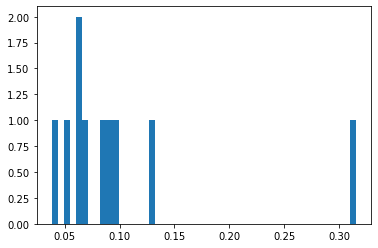

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(distributions[:, 0, 2], bins=50);

The sum probabilities for a batch in an iteration is equal to `1`.

In [4]:
distributions[:, 0, 0]

array([0.20099541, 0.06490484, 0.29254148, 0.03144375, 0.11772944,
       0.14780936, 0.00674131, 0.01192585, 0.04828815, 0.07762042])

In [5]:
distributions[:, 0, 0].sum()

1.0

Now lets see how `BALD` defines the next data point in a batch of `4` to be labelled.

In [6]:
from baal.active.heuristics import BALD

heuristic = BALD(shuffle_prop=0.0, threshold=None, reduction='none')
ranked_indexes = heuristic(distributions)
print(ranked_indexes)

[7 8 2 3 6 5 0 1 9 4]


The above is the resulted ordered indexes for data points to be labelled. The first index in the list is the most informative datapoint. To justify this we will need to plot the distribution over different iterations and see if we find something interesting.

In [7]:
from scipy.special import xlogy
mu_ = - np.mean(np.sum(xlogy(distributions, distributions), axis=1), axis=-1)

In [8]:
mu_.shape

(10,)

Lets see distribution of predictions for the 7th, 6rd and 4th index points.

expected prediction value for data index 7 : 0.5752225707930843


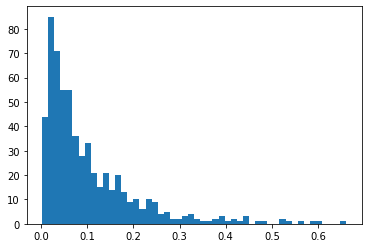

In [16]:
fig, ax = plt.subplots()
index = 7
print("expected prediction value for data index {} : {}".format(index, mu_[index]))
predictions = np.reshape(distributions[index, :, :], [n_cls * n_iterations])
ax.hist(predictions, bins=50);

expected prediction value for data index 6 : 0.5993807821159103


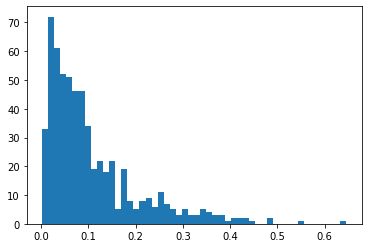

In [17]:
fig, ax = plt.subplots()
index = 6
print("expected prediction value for data index {} : {}".format(index, mu_[index]))
predictions = np.reshape(distributions[index, :, :], [n_cls * n_iterations])
ax.hist(predictions, bins=50);

expected prediction value for data index 6 : 0.5993807821159103


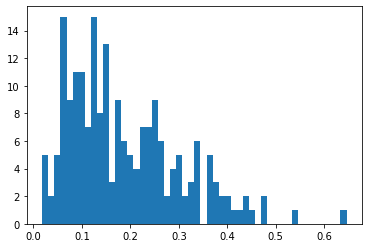

In [10]:
fig, ax = plt.subplots()
index = 6
print("expected prediction value for data index {} : {}".format(index, mu_[index]))
predictions = [np.max(distributions[index, :, iteration]) for iteration in range(n_iterations)]
ax.hist(predictions, bins=50);

expected prediction value for data index 4 : 0.5445648131961467


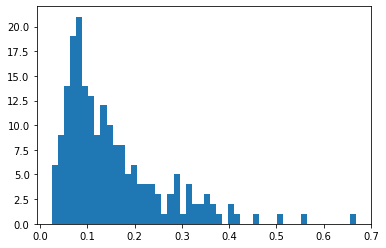

In [11]:
fig, ax = plt.subplots()
index = 4
print("expected prediction value for data index {} : {}".format(index, mu_[index]))
predictions = [np.max(distributions[index, :, iteration]) for iteration in range(n_iterations)]
ax.hist(predictions, bins=50);

As you can see, the 9th datapoint as the most uncertainty over its predictions in different iterations, given the expected value of the iterations.